In [2]:
import camelot
import pandas as pd
import pdfplumber

In [3]:
pd.set_option('display.max_rows', 50)

## Camelot and School Lice

### Which school had the most cases of lice in each year across all grades?

#### [Read the PDF and specify the pages you want to scan for tables](https://camelot-py.readthedocs.io/en/master/user/quickstart.html).

In [4]:
tables = camelot.read_pdf('pdfs/san-diego-school-lice.pdf', pages='1-end', flavor='lattice')

#### How many tables did Camelot detect?

In [5]:
tables

<TableList n=20>

Camelot is telling us it detected 20 tables. That's not a surprise since we know our PDF has 20 pages with tables on it and Camelot treats each table detected on a separate page as a separate table. So far, so good.

#### Let's see the first table.

In [6]:
tables[0]

<Table shape=(47, 5)>

Camelot detected the table has 47 rows and five columns.

In [7]:
tables[0].df

,0,1,2,3,4
0,,SCHOOL,GRADE,14‐15 \nVisits,15‐16 \nVisits
1,,,,,
2,,Adams Elementary,K,0,4
3,,Adams Elementary,1,1,0
4,,Adams Elementary,2,1,1
5,,Adams Elementary,3,2,2
6,,Adams Elementary,4,3,2
7,,Adams Elementary,5,0,0
8,,ALBA,7,1,0
9,,ALBA,8,0,3


#### Read the PDF using the "stream" method.

["Lattice" vs. "Stream"](https://camelot-py.readthedocs.io/en/master/user/how-it-works.html): Lattice can be used to parse tables that have demarcated lines between cells. Stream can be used to parse tables that have whitespaces between cells to simulate a table structure. If a method is not specified, lattice is used by default.

In [8]:
tables_stream = camelot.read_pdf('pdfs/san-diego-school-lice.pdf', pages='1-end', flavor='stream')

In [9]:
tables_stream[0]

<Table shape=(49, 7)>

This time, Camelot detected the table has 49 rows and seven columns.

In [10]:
tables_stream[0].df

,0,1,2,3,4,5,6
0,,,Lice Office Visits,,,,
1,,14 ‐ 16,,,,,
2,,,,14‐15,,15‐16,
3,SCHOOL,GRADE,,Visits,,Visits,
4,Adams Elementary,,K,,0,,4
5,Adams Elementary,,1,,1,,0
6,Adams Elementary,,2,,1,,1
7,Adams Elementary,,3,,2,,2
8,Adams Elementary,,4,,3,,2
9,Adams Elementary,,5,,0,,0


As you can see, Camelot used white space to demarcate columns and rows. In this case, the "lattice" method is the proper one. So let's go back to working with that.

#### Combine the 20 extracted tables into a single table with all the schools.

What do the first five rows of the first table look like?

In [11]:
tables[0].df.head()

,0,1,2,3,4
0,,SCHOOL,GRADE,14‐15 \nVisits,15‐16 \nVisits
1,,,,,
2,,Adams Elementary,K,0,4
3,,Adams Elementary,1,1,0
4,,Adams Elementary,2,1,1


What do the first five rows of the last table look like?

In [12]:
tables[19].df.head()

,0,1,2,3,4
0,,SCHOOL,GRADE,Visits,Visits
1,,Wegeforth Elementary,3,1,1
2,,Wegeforth Elementary,4,1,0
3,,Whitman Elementary,K,0,3
4,,Whitman Elementary,1,0,0


What do the last five rows of the last table look like

In [13]:
tables[19].df.tail()

,0,1,2,3,4
27,,Zamorano Elementary,2,2,1
28,,Zamorano Elementary,3,1,2
29,,Zamorano Elementary,4,1,3
30,,Zamorano Elementary,5,1,0
31,,Totals,,1727,2788


Combine the tables.

In [14]:
tables[0]

<Table shape=(47, 5)>

In [40]:
# Create an empty list
table_dfs = []
# Convert each item in the list of tables to a dataframe and append them to a list
table_dfs = [tables[i].df for i in range(len(tables))]
# Concatenate the dataframes in the list into a single dataframe
san_diego_school_lice = pd.concat(table_dfs)
san_diego_school_lice

,0,1,2,3,4
0,,SCHOOL,GRADE,14‐15 \nVisits,15‐16 \nVisits
1,,,,,
2,,Adams Elementary,K,0,4
3,,Adams Elementary,1,1,0
4,,Adams Elementary,2,1,1
5,,Adams Elementary,3,2,2
6,,Adams Elementary,4,3,2
7,,Adams Elementary,5,0,0
8,,ALBA,7,1,0
9,,ALBA,8,0,3


#### Clean the data.

In [41]:
# Set the first row as the column headers
san_diego_school_lice = san_diego_school_lice.rename(columns=san_diego_school_lice.iloc[0])
# Drop the first two rows
san_diego_school_lice = san_diego_school_lice.drop(san_diego_school_lice.index[[0, 1]])
san_diego_school_lice.head()

,,SCHOOL,GRADE,14‐15 Visits,15‐16 Visits
2,,Adams Elementary,K,0,4
3,,Adams Elementary,1,1,0
4,,Adams Elementary,2,1,1
5,,Adams Elementary,3,2,2
6,,Adams Elementary,4,3,2


#### Export the tables.

In [16]:
san_diego_school_lice.to_csv('data/san-diego-school-lice.csv')

## pdfplumber and California WARN Act notices

### Which company gave notice of the most layoffs?

#### Read the PDF.

In [17]:
pdf = pdfplumber.open('pdfs/ca-warn-report.pdf')

#### How many pages did pdfplumber detect?

In [18]:
len(pdf.pages)

16

pdfplumber is telling us it detected 16 pages. We know this PDF has 16 pages so that checks out. pdfplumber also has the ability to select multiple tables on a single page. We'll see that shortly.

#### Let's see the first page.

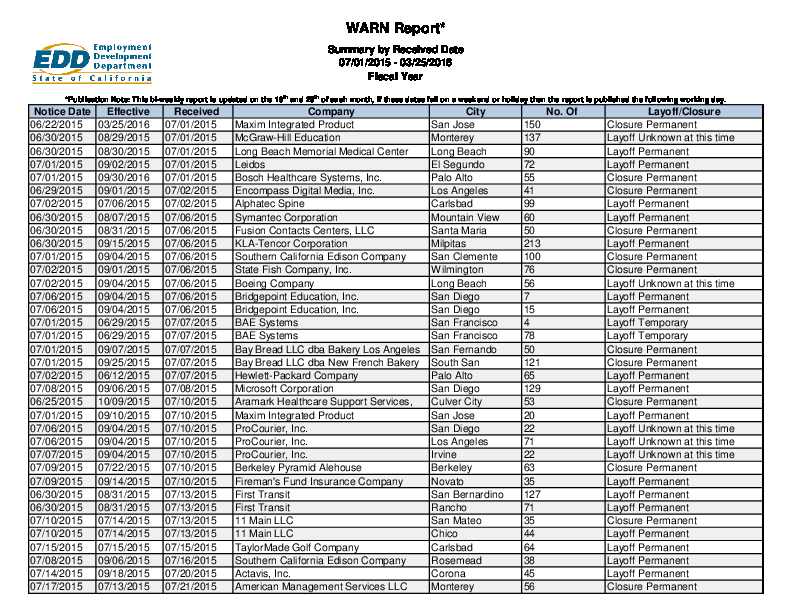

In [19]:
pdf.pages[0].to_image()

#### How pdfplumber sees the page

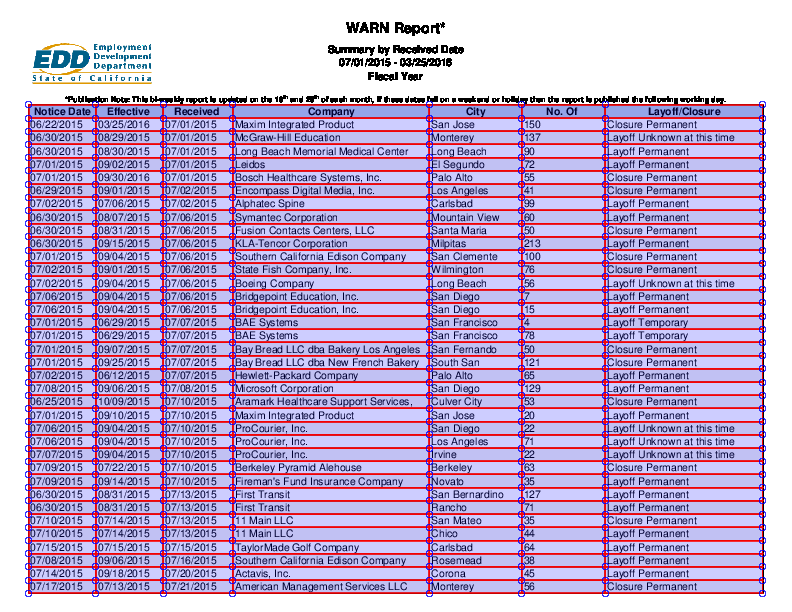

In [20]:
pdf.pages[0].to_image().debug_tablefinder()

#### Extract data from the table.

In [21]:
table = pdf.pages[0].extract_table()
table[:3]

[['Notice Date',
  'Effective',
  'Received',
  'Company',
  'City',
  'No. Of',
  'Layoff/Closure'],
 ['06/22/2015',
  '0  3  / 2  5  / 2  0  16',
  '0  7  / 0  1  / 2  0  15',
  'Maxim Integrated Product',
  'San Jose',
  '150',
  'Closure Permanent'],
 ['06/30/2015',
  '0  8  / 2  9  / 2  0  15',
  '0  7  / 0  1  / 2  0  15',
  'McGraw-Hill Education',
  'Monterey',
  '137',
  'Layoff Unknown at this time']]

### Combine all the tables in the file.

In [22]:
tables = pdf.pages

In [23]:
# Create an empty list
table_dfs = []
# Convert each item in the list of tables to a dataframe and append them to a list
table_dfs = [pd.DataFrame(tables[i].extract_table()) for i in range(len(tables))]
# Concatenate the dataframes in the list into a single dataframe
ca_warn_notices = pd.concat(table_dfs)
ca_warn_notices.head()

,0,1,2,3,4,5,6,7,8
0,Notice Date,Effective,Received,Company,City,No. Of,Layoff/Closure,NaN,NaN
1,06/22/2015,0 3 / 2 5 / 2 0 16,0 7 / 0 1 / 2 0 15,Maxim Integrated Product,San Jose,150,Closure Permanent,NaN,NaN
2,06/30/2015,0 8 / 2 9 / 2 0 15,0 7 / 0 1 / 2 0 15,McGraw-Hill Education,Monterey,137,Layoff Unknown at this time,NaN,NaN
3,06/30/2015,0 8 / 3 0 / 2 0 15,0 7 / 0 1 / 2 0 15,Long Beach Memorial Medical Center,Long Beach,90,Layoff Permanent,NaN,NaN
4,07/01/2015,0 9 / 0 2 / 2 0 15,0 7 / 0 1 / 2 0 15,Leidos,El Segundo,72,Layoff Permanent,NaN,NaN


#### Do some data cleaning.

In [24]:
# Use the first row as the column names
ca_warn_notices.columns = ca_warn_notices.iloc[0]
ca_warn_notices = ca_warn_notices[1:]
# Deal with extra spaces in the second and third columns
ca_warn_notices['Effective'] = ca_warn_notices['Effective'].str.replace(' ', '')
ca_warn_notices['Received'] = ca_warn_notices['Received'].str.replace(' ', '')
ca_warn_notices.head()

,Notice Date,Effective,Received,Company,City,No. Of,Layoff/Closure,nan,nan
1,06/22/2015,03/25/2016,07/01/2015,Maxim Integrated Product,San Jose,150,Closure Permanent,NaN,NaN
2,06/30/2015,08/29/2015,07/01/2015,McGraw-Hill Education,Monterey,137,Layoff Unknown at this time,NaN,NaN
3,06/30/2015,08/30/2015,07/01/2015,Long Beach Memorial Medical Center,Long Beach,90,Layoff Permanent,NaN,NaN
4,07/01/2015,09/02/2015,07/01/2015,Leidos,El Segundo,72,Layoff Permanent,NaN,NaN
5,07/01/2015,09/30/2016,07/01/2015,"Bosch Healthcare Systems, Inc.",Palo Alto,55,Closure Permanent,NaN,NaN


## pdfplumber and food insecurity data

In [42]:
pdf = pdfplumber.open('pdfs/us-food-insecurity.pdf')

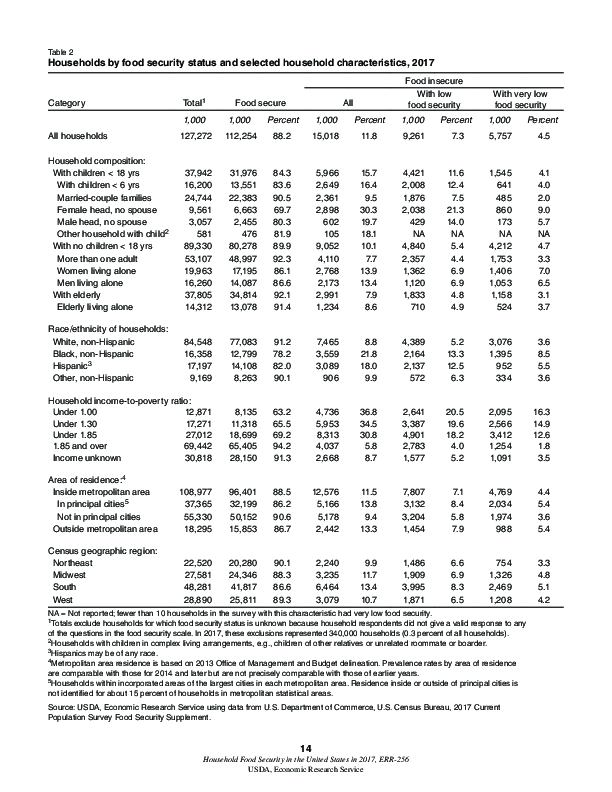

In [48]:
im = pdf.pages[21].to_image()
im

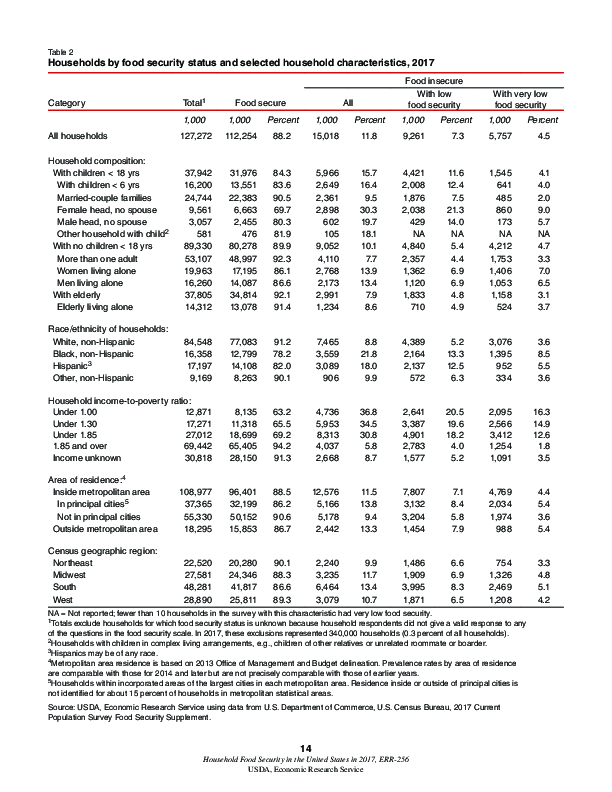

In [51]:
im.reset().debug_tablefinder()

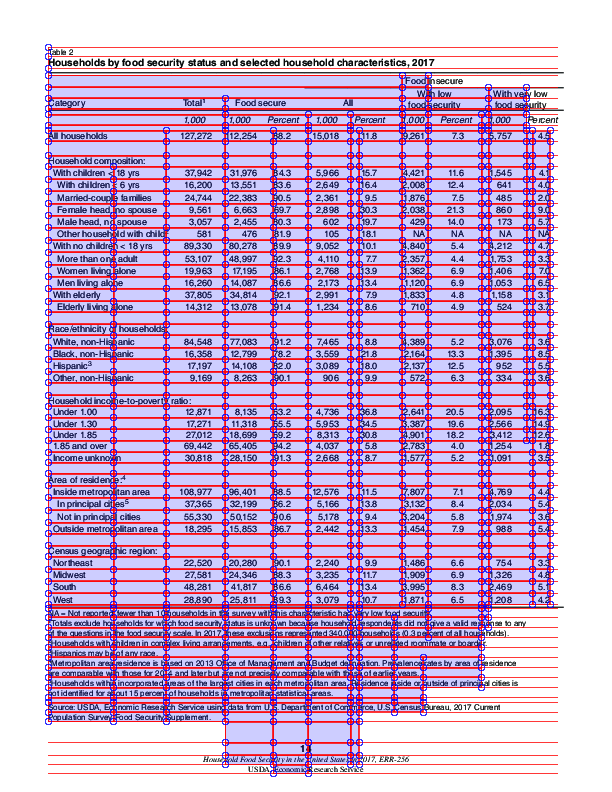

In [99]:
table_settings = {
    "vertical_strategy": "text",
    "horizontal_strategy": "text"
}
im.reset().debug_tablefinder(table_settings)

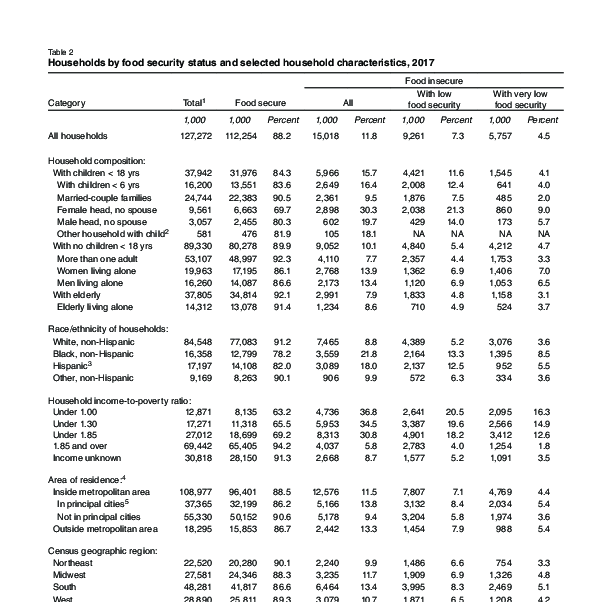

In [181]:
cropped = pdf.pages[21].crop((0, 0, pdf.pages[21].width, pdf.pages[21].height-190))
im_cropped = cropped.to_image()
im_cropped

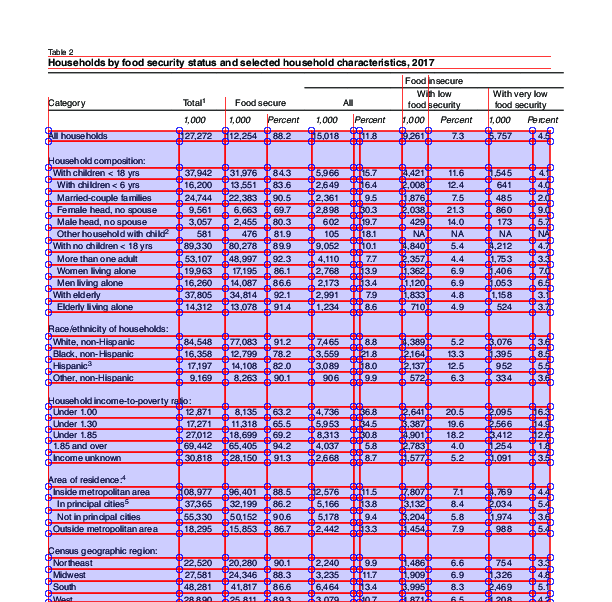

In [182]:
table_settings = {
    "vertical_strategy": "text",
    "horizontal_strategy": "text",
    "min_words_horizontal": 10,
    "min_words_vertical": 20
}
im_cropped.reset().debug_tablefinder(table_settings)

#### Convert to a dataframe

In [195]:
food_insecurity_df = pd.DataFrame(cropped.extract_table(table_settings))
food_insecurity_df

,0,1,2,3,4,5,6,7,8,9,10
0,All households,"127,272","112,254",88.2,"15,018",,11.8,"9,261",7.3,"5,757",4.5
1,Household composition:,,,,,,,,,,
2,With children < 18 yrs,"37,942","31,976",84.3,"5,966",,15.7,"4,421",11.6,"1,545",4.1
3,With children < 6 yrs,"16,200","13,551",83.6,"2,649",,16.4,"2,008",12.4,641,4.0
4,Married-couple families,"24,744","22,383",90.5,"2,361",,9.5,"1,876",7.5,485,2.0
5,"Female head, no spouse","9,561","6,663",69.7,"2,898",,30.3,"2,038",21.3,860,9.0
6,"Male head, no spouse","3,057","2,455",80.3,602,,19.7,429,14.0,173,5.7
7,Other household with child2,581,476,81.9,105,,18.1,NA,NA,NA,NA
8,With no children < 18 yrs,"89,330","80,278",89.9,"9,052",,10.1,"4,840",5.4,"4,212",4.7
9,More than one adult,"53,107","48,997",92.3,"4,110",,7.7,"2,357",4.4,"1,753",3.3


In [196]:
# Drop the empty column
food_insecurity_df = food_insecurity_df.drop(5, axis=1)

In [198]:
# Drop the rows containing no data
food_insecurity_df = food_insecurity_df[food_insecurity_df[10] != '']
food_insecurity_df

,0,1,2,3,4,6,7,8,9,10
0,All households,"127,272","112,254",88.2,"15,018",11.8,"9,261",7.3,"5,757",4.5
2,With children < 18 yrs,"37,942","31,976",84.3,"5,966",15.7,"4,421",11.6,"1,545",4.1
3,With children < 6 yrs,"16,200","13,551",83.6,"2,649",16.4,"2,008",12.4,641,4.0
4,Married-couple families,"24,744","22,383",90.5,"2,361",9.5,"1,876",7.5,485,2.0
5,"Female head, no spouse","9,561","6,663",69.7,"2,898",30.3,"2,038",21.3,860,9.0
6,"Male head, no spouse","3,057","2,455",80.3,602,19.7,429,14.0,173,5.7
7,Other household with child2,581,476,81.9,105,18.1,NA,NA,NA,NA
8,With no children < 18 yrs,"89,330","80,278",89.9,"9,052",10.1,"4,840",5.4,"4,212",4.7
9,More than one adult,"53,107","48,997",92.3,"4,110",7.7,"2,357",4.4,"1,753",3.3
10,Women living alone,"19,963","17,195",86.1,"2,768",13.9,"1,362",6.9,"1,406",7.0


In [199]:
food_insecurity_df.columns=['category', 'total', 'food_secure', 'food_secure_pct', 'food_insecure_all',
                           'food_insecure_all_pct', 'food_insecure_low_food_security',
                            'food_insecure_low_food_security_pct', 'food_insecure_very_low_food_security',
                           'food_insecure_very_low_food_security_pct']
food_insecurity_df.head()

,category,total,food_secure,food_secure_pct,food_insecure_all,food_insecure_all_pct,food_insecure_low_food_security,food_insecure_low_food_security_pct,food_insecure_very_low_food_security,food_insecure_very_low_food_security_pct
0,All households,"127,272","112,254",88.2,"15,018",11.8,"9,261",7.3,"5,757",4.5
2,With children < 18 yrs,"37,942","31,976",84.3,"5,966",15.7,"4,421",11.6,"1,545",4.1
3,With children < 6 yrs,"16,200","13,551",83.6,"2,649",16.4,"2,008",12.4,641,4.0
4,Married-couple families,"24,744","22,383",90.5,"2,361",9.5,"1,876",7.5,485,2.0
5,"Female head, no spouse","9,561","6,663",69.7,"2,898",30.3,"2,038",21.3,860,9.0


In [184]:
food_insecurity_df = food_insecurity_df.dropna(subset=['sms'])

KeyError: ['sms']